# Trabajo Integrador Parte 4

Nombre:

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [3]:
DATASET_PATH = "./data/heart_disease/"

In [4]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

my_data = pd.read_csv(DATASET_PATH + 'processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [5]:
my_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [25]:
my_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [6]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "thalach"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = "num"

Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [22]:
my_data[target].value_counts()

0    163
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [26]:
y = my_data[target].values

In [30]:
y[1:10]

array([1, 0, 0, 0, 3, 0, 2, 1, 0])

In [31]:
sano_mask = y == 0
enfermo_mask = y > 0

In [32]:
y_class = y.copy()

y_class[sano_mask] = 0
y_class[enfermo_mask] = 1

In [58]:
# chequeo si las clases están balanceadas
print(len(y_class[sano_mask]))
print(len(y_class[enfermo_mask]))

163
139


In [34]:
pd.get_dummies(my_data[categorical_features])

,sex,cp,fbs,restecg,exang,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,1.0,4.0,0.0,2.0,1.0,2.0,0,0,0,1,0,1,0,0,0
1,1.0,4.0,0.0,2.0,1.0,2.0,0,0,1,0,0,0,0,1,0
2,1.0,3.0,0.0,0.0,0.0,3.0,1,0,0,0,0,1,0,0,0
3,0.0,2.0,0.0,2.0,0.0,1.0,1,0,0,0,0,1,0,0,0
4,1.0,2.0,0.0,0.0,0.0,1.0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.0,1.0,0.0,0.0,0.0,2.0,1,0,0,0,0,0,0,1,0
298,1.0,4.0,1.0,0.0,0.0,2.0,0,0,1,0,0,0,0,1,0
299,1.0,4.0,0.0,0.0,1.0,2.0,0,1,0,0,0,0,0,1,0
300,0.0,2.0,0.0,2.0,0.0,2.0,0,1,0,0,0,1,0,0,0


In [35]:
pca = PCA(n_components=0.9).fit(my_data[numerical_features])

pca.n_components_

2

In [36]:
X_transformed = pca.transform(my_data[numerical_features])

In [37]:
X_transformed

array([[ 4.15197276e+01,  6.04359951e+01],
       [-1.75994017e+01,  3.01920764e+01],
       [ 2.12973462e+00, -5.45861630e+01],
       [-4.34743454e+01, -3.24753433e+01],
       [-1.15270317e+01, -3.99676683e+01],
       [ 2.18359694e+01, -1.36251712e+01],
       [ 1.06416100e+02, -2.03988377e+01],
       [ 7.52203752e+00,  4.50457172e+00],
       [-4.33295298e+01, -6.79174957e+00],
       [-5.40858010e+01,  3.61377300e+00],
       [ 4.76163183e+01, -4.88514137e+00],
       [ 9.29523476e+00,  1.06638337e+01],
       [ 1.50008069e+01, -3.47313944e+01],
       [-4.58080508e+01, -1.54606005e+01],
       [-7.77844491e+01, -3.21393208e+01],
       [-1.92309131e+01, -2.71659586e+01],
       [-7.41691526e+00, -1.42000964e+01],
       [ 2.79752555e+01,  1.36751141e+01],
       [ 1.87164266e+01, -3.09825000e+01],
       [-3.63354231e+01,  8.63630131e+00],
       [ 3.71347167e+01, -1.67444313e+01],
       [ 3.66305869e+01, -1.51122588e+01],
       [-2.27632860e+01, -3.20576672e+01],
       [-4.

<AxesSubplot:>

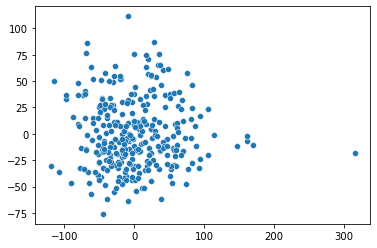

In [38]:
sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1])

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_class, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Logistic Regression CV': LogisticRegressionCV(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Grid search para definir hiperparámetros
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Logistic Regression CV' : {},
    'Decision Tree': {'max_depth': [None, 5, 10, 15]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
}

classifier_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_roc_scores = []

# Training y evaluación para cada uno de los hp
for clf_name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid[clf_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    classifier_names.append(clf_name)


    # Obtengo mejores estimadores
    best_clf = grid_search.best_estimator_
    
    # Realizo predicciones con los mejores estimadores
    y_pred = best_clf.predict(X_test)
    
    # Evaluo la performance del mejor estimador
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    auc_roc_scores.append(roc_auc)

    print(f"Classifier: {clf_name}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC Score: {roc_auc:.4f}")
    print("-------------------------------")

Classifier: Logistic Regression
Best Hyperparameters: {'C': 0.1}
Accuracy: 0.6885
Precision: 0.6667
Recall: 0.6897
F1 Score: 0.6780
AUC-ROC Score: 0.6886
-------------------------------
Classifier: Logistic Regression CV
Best Hyperparameters: {}
Accuracy: 0.6557
Precision: 0.6538
Recall: 0.5862
F1 Score: 0.6182
AUC-ROC Score: 0.6525
-------------------------------
Classifier: Decision Tree
Best Hyperparameters: {'max_depth': 5}
Accuracy: 0.5738
Precision: 0.5600
Recall: 0.4828
F1 Score: 0.5185
AUC-ROC Score: 0.5695
-------------------------------
Classifier: Random Forest
Best Hyperparameters: {'max_depth': 5, 'n_estimators': 300}
Accuracy: 0.6230
Precision: 0.6000
Recall: 0.6207
F1 Score: 0.6102
AUC-ROC Score: 0.6228
-------------------------------


In [53]:
# Obtengo el modelo ganador

winning_model_accuracy = classifier_names[accuracies.index(max(accuracies))]
winning_model_precision = classifier_names[precisions.index(max(precisions))]
winning_model_recall = classifier_names[recalls.index(max(recalls))]
winning_model_f1 = classifier_names[f1_scores.index(max(f1_scores))]
winning_model_auc_roc = classifier_names[auc_roc_scores.index(max(auc_roc_scores))]

print(f"Winning model for Accuracy: {winning_model_accuracy}")
print(f"Winning model for Precision: {winning_model_precision}")
print(f"Winning model for Recall: {winning_model_recall}")
print(f"Winning model for F1 Score: {winning_model_f1}")
print(f"Winning model for AUC-ROC Score: {winning_model_auc_roc}")

Winning model for Accuracy: Logistic Regression
Winning model for Precision: Logistic Regression
Winning model for Recall: Logistic Regression
Winning model for F1 Score: Logistic Regression
Winning model for AUC-ROC Score: Logistic Regression


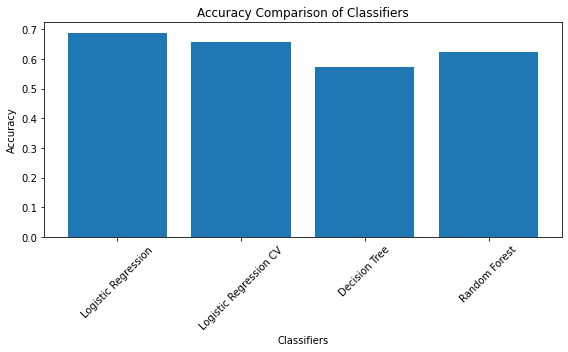

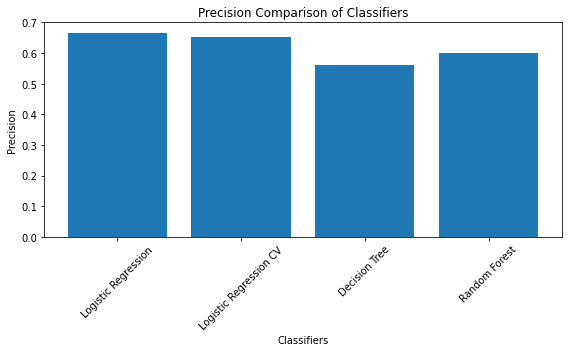

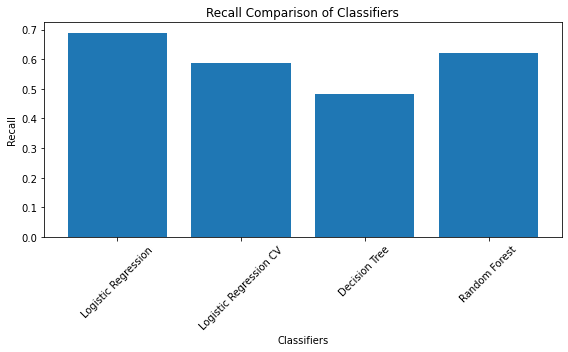

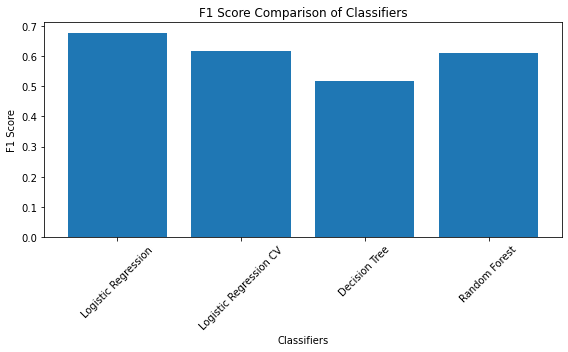

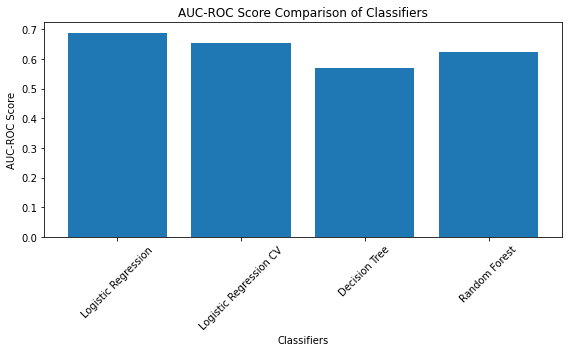

In [59]:
import matplotlib.pyplot as plt

def plot_metric(metric_values, metric_name):
    plt.figure(figsize=(8, 5))
    plt.bar(classifier_names, metric_values)
    plt.xlabel('Classifiers')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Comparison of Classifiers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_metric(accuracies, 'Accuracy')
plot_metric(precisions, 'Precision')
plot_metric(recalls, 'Recall')
plot_metric(f1_scores, 'F1 Score')
plot_metric(auc_roc_scores, 'AUC-ROC Score')

### Conclusiones

Se definieron las métricas de Accuracy, precision, recall, f1 y roc auc.

Se probaron cuatro modelos distintos Logistic Regression, Logistic Regression CV, Decision Tree y Random Forest, con distintos hiperparámetros, y se obtuvo qeu el mejor modelo evaluado en las métricas mencionadas fue el de Logistic Regression.
